In [4]:
!pip install tensorflow


In [6]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [7]:
tf.__version__

'2.8.0'

In [8]:
defn = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
defn=defn. iloc[::-1]
defn.head()


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [9]:
defn.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [10]:
defn.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [11]:
defn.shape

(2035, 8)

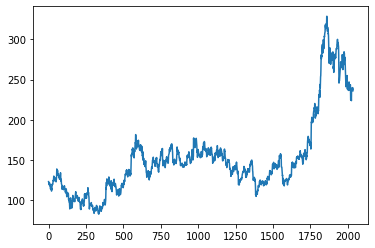

In [12]:
defn_high=defn.reset_index()['High']
plt.plot(defn_high)

In [13]:
sclr = MinMaxScaler(feature_range = (0,1))
defn_high = sclr.fit_transform(np.array(defn_high).reshape(-1,1))

In [14]:
defn_high.shape

(2035, 1)

In [15]:
defn_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

In [16]:
trainsz = int(len(defn_high) * 0.75)
testsz = len(defn_high) - trainsz
traindata, testdata = defn_high[0:trainsz,:], defn_high[trainsz:len(defn_high),:1]

In [17]:
trainsz,testsz

(1526, 509)

In [18]:
def create_dataset(dataset, tstep = 1):
    dX, dY = [], []
    for i in range(len(dataset) - tstep - 1):
        v = dataset[i:(i+tstep), 0]
        dX.append(v)
        dY.append(dataset[i+tstep, 0])
    return np.array(dX), np.array(dY)

    
tstep = 100
xtrainer, ytrainer = create_dataset(traindata, tstep)
xtester, ytester = create_dataset(testdata, tstep)

In [19]:
xtrainer = xtrainer.reshape(xtrainer.shape[0], xtrainer.shape[1], 1)
xtester = xtester.reshape(xtester.shape[0], xtester.shape[1], 1)


print(xtrainer.shape), print(ytrainer.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [20]:
print(xtester.shape), print(ytester.shape)

(408, 100, 1)
(408,)


(None, None)

In [21]:
mdl = Sequential()
mdl.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
mdl.add(LSTM(50, return_sequences = True))
mdl.add(LSTM(50))
mdl.add(Dense(1))
mdl.compile(loss = 'mean_squared_error', optimizer = 'adam')


mdl.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
mdl.fit(xtrainer, ytrainer, validation_data = (xtester, ytester), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 30s 552ms/step - loss: 0.0114 - val_loss: 0.0499
Epoch 2/100
23/23 [==============================] - 10s 455ms/step - loss: 0.0022 - val_loss: 0.0052
Epoch 3/100
23/23 [==============================] - 10s 449ms/step - loss: 8.5312e-04 - val_loss: 0.0036
Epoch 4/100
23/23 [==============================] - 10s 449ms/step - loss: 7.7341e-04 - val_loss: 0.0029
Epoch 5/100
23/23 [==============================] - 10s 445ms/step - loss: 7.7582e-04 - val_loss: 0.0031
Epoch 6/100
23/23 [==============================] - 10s 450ms/step - loss: 7.1556e-04 - val_loss: 0.0031
Epoch 7/100
23/23 [==============================] - 10s 452ms/step - loss: 6.7338e-04 - val_loss: 0.0039
Epoch 8/100
23/23 [==============================] - 10s 445ms/step - loss: 6.8847e-04 - val_loss: 0.0041
Epoch 9/100
23/23 [==============================] - 10s 445ms/step - loss: 6.6248e-04 - val_loss: 0.0030
Epoch 10/100
23/23 [==============================] - 

23/23 [==============================] - 10s 438ms/step - loss: 1.2892e-04 - val_loss: 6.8228e-04
Epoch 78/100
23/23 [==============================] - 10s 440ms/step - loss: 1.2034e-04 - val_loss: 0.0021
Epoch 79/100
23/23 [==============================] - 10s 451ms/step - loss: 1.4421e-04 - val_loss: 7.7305e-04
Epoch 80/100
23/23 [==============================] - 10s 433ms/step - loss: 1.2870e-04 - val_loss: 0.0016
Epoch 81/100
23/23 [==============================] - 10s 446ms/step - loss: 1.2094e-04 - val_loss: 7.5974e-04
Epoch 82/100
23/23 [==============================] - 10s 433ms/step - loss: 1.2173e-04 - val_loss: 0.0016
Epoch 83/100
23/23 [==============================] - 10s 434ms/step - loss: 1.2239e-04 - val_loss: 0.0014
Epoch 84/100
23/23 [==============================] - 10s 441ms/step - loss: 1.2117e-04 - val_loss: 5.9343e-04
Epoch 85/100
23/23 [==============================] - 10s 439ms/step - loss: 1.3625e-04 - val_loss: 0.0010
Epoch 86/100
23/23 [==============

In [23]:
trpd = mdl.predict(xtrainer)
tpd = mdl.predict(xtester)

In [24]:
trpd = sclr.inverse_transform(trpd)
tpd = sclr.inverse_transform(tpd)

In [25]:
math.sqrt(mean_squared_error(ytrainer, trpd))

136.12095663068797

In [26]:
math.sqrt(mean_squared_error(ytester, tpd))

230.56080114306292

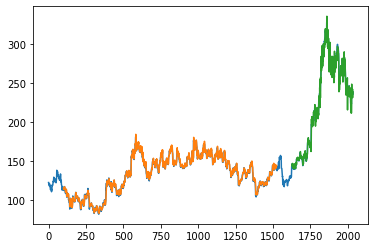

Green indicates the predicted data
Blue indicates the complete data
Orange indicates the trained data


In [27]:
lb = 100
trpdPlot = np.empty_like(defn_high)
trpdPlot[:,:] = np.nan
trpdPlot[lb:len(trpd) + lb, :] = trpd

tpdPlot = np.empty_like(defn_high)
tpdPlot[:,:] = np.nan
tpdPlot[len(trpd) + (lb * 2)+1:len(defn_high) - 1, :] = tpd

plt.plot(sclr.inverse_transform(defn_high))
plt.plot(trpdPlot)
plt.plot(tpdPlot)
plt.show()

print("Green indicates the predicted data")
print("Blue indicates the complete data")
print("Orange indicates the trained data")

In [28]:
len(testdata), xtester.shape

(509, (408, 100, 1))

In [29]:
xinput = testdata[409:].reshape(1,-1)
xinput.shape

(1, 100)

In [30]:
tmpinput = list(xinput)
temp_input = tmpinput[0].tolist()

lstoutput=[]
nossteps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        xinput=np.array(temp_input[1:])
        print("{} day input {}".format(i,xinput))
        xinput=xinput.reshape(1,-1)
        xinput = xinput.reshape((1, nossteps, 1))
        yhat = mdl.predict(xinput, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lstoutput.extend(yhat.tolist())
        i=i+1
    else:
        xinput = xinput.reshape((1, nossteps,1))
        yhat = mdl.predict(xinput, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lstoutput.extend(yhat.tolist())
        i=i+1
    

print(lstoutput)

[0.6145745]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 0

10 day output [[0.496723]]
11 day input [0.68936776 0.70217524 0.71803212 0.72941655 0.73144948 0.74486684
 0.76926205 0.75991055 0.74242732 0.73958122 0.74771295 0.75991055
 0.7584875  0.76621264 0.75462492 0.76316324 0.79670665 0.80585485
 0.7889815  0.78003659 0.73978451 0.73002643 0.73490547 0.74872942
 0.75991055 0.75462492 0.75401504 0.76174019 0.7737345  0.82008538
 0.80585485 0.81154706 0.77434438 0.78633869 0.79284407 0.78328929
 0.77109169 0.74385038 0.71193332 0.68733482 0.67818662 0.65257166
 0.64301687 0.65643423 0.67656028 0.67371417 0.65114861 0.65521447
 0.66761537 0.67838992 0.69993901 0.63122586 0.63508843 0.64098394
 0.64545639 0.64118723 0.63854442 0.63081927 0.62472047 0.6330555
 0.64728603 0.6574507  0.66761537 0.66720878 0.64159382 0.62776987
 0.63651149 0.63630819 0.62980281 0.62817646 0.63813783 0.65358813
 0.63183574 0.57653995 0.57816629 0.57613336 0.61943484 0.57979264
 0.57288067 0.62573694 0.63102257 0.6361049  0.62776987 0.6269567
 0.63590161 0.62594023 0

19 day output [[0.47273132]]
20 day input [0.73958122 0.74771295 0.75991055 0.7584875  0.76621264 0.75462492
 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659 0.73978451
 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492 0.75401504
 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706 0.77434438
 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038 0.71193332
 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423 0.67656028
 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992 0.69993901
 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723 0.63854442
 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507  0.66761537
 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819 0.62980281
 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995 0.57816629
 0.57613336 0.61943484 0.57979264 0.57288067 0.62573694 0.63102257
 0.6361049  0.62776987 0.6269567  0.63590161 0.62594023 0.6391543
 0.62614353 0.62268754 0.61457449 0.6035766  0.58754241 0.5704928
 0.5547747  0.5410502 

27 day output [[0.46143952]]
[[0.6145744919776917], [0.6035766005516052], [0.5875424146652222], [0.5704928040504456], [0.5547747015953064], [0.5410501956939697], [0.5291706323623657], [0.5189208984375], [0.510242223739624], [0.502885639667511], [0.4967229962348938], [0.4916885793209076], [0.48768121004104614], [0.4845130741596222], [0.48195508122444153], [0.479796826839447], [0.4778789281845093], [0.4760969877243042], [0.47439083456993103], [0.4727313220500946], [0.4711104929447174], [0.46953415870666504], [0.4680160582065582], [0.46657291054725647], [0.46516695618629456], [0.46382105350494385], [0.4625701606273651], [0.4614395201206207]]


In [31]:
dnew = np.arange(1,101)
dpred = np.arange(101,129)

In [32]:
dnew.shape

(100,)

In [33]:
dpred.shape

(28,)

In [34]:
defn3 = defn_high.tolist()
defn3.extend(lstoutput)

len(defn_high)

2035

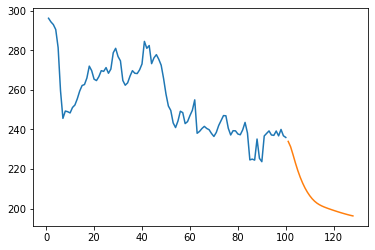

In [35]:
plt.plot(dnew, sclr.inverse_transform(defn_high[1935:]))
plt.plot(dpred, sclr.inverse_transform(lstoutput))

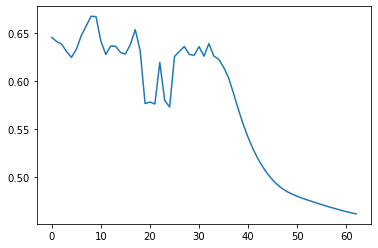

In [36]:
defn3=defn_high.tolist()
defn3.extend(lstoutput)
plt.plot(defn3[2000:])

In [37]:
defn3=sclr.inverse_transform(defn3).tolist()

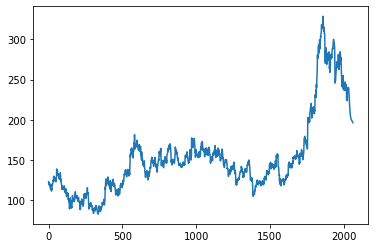

In [38]:
plt.plot(defn3)

CONCLUSION

We have successfully completed a project on stock market prediction and forecasting using stacked LSTM.